

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Sentiment Analysis on Movie Reviews
</div>


![IMDB](https://sprcdn-assets.sprinklr.com/674/8b955864-7307-4d41-8ded-c194170f5305-2729152590.jpg)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    What is Sentiment Analysis ?
</div>

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique used to determine the sentiment or emotional tone conveyed in a piece of text. It involves analyzing text data to identify and extract subjective information such as opinions, sentiments, attitudes, and emotions expressed by individuals or entities towards specific topics, products, services, events, or experiences.

![Sentiment](https://cdn.brandmentions.com/blog/wp-content/uploads/2019/05/sentiment-analysys-brandmentions.png)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Steps In Sentiment Analysis
</div>



Here are the typical steps involved in sentiment analysis:

1. **Data Collection**: Gather the text data from various sources such as social media, customer reviews, surveys, or any other relevant sources. Ensure that the data collected is relevant to the sentiment analysis task at hand.

2. **Data Preprocessing**:
    - **Text Cleaning**: Remove noise from the text data by removing special characters, punctuation, HTML tags, URLs, and other irrelevant symbols.
    - **Tokenization**: Split the text into individual words or tokens.
    - **Lowercasing**: Convert all text to lowercase to ensure consistency in word representation.
    - **Stopword Removal**: Eliminate common words such as "the", "is", "and", etc., which do not carry significant meaning for sentiment analysis.
    - **Stemming or Lemmatization**: Reduce words to their base or root form to normalize the text data.
    - **Handling Negations**: Address negations (e.g., "not good") to ensure accurate sentiment analysis.

3. **Feature Extraction**:
    - **Bag-of-Words (BoW)**: Represent the text data as a numerical feature vector based on word frequencies.
    - **TF-IDF (Term Frequency-Inverse Document Frequency)**: Assign weights to words based on their frequency in the document and inverse frequency across the entire corpus.
    - **Word Embeddings**: Utilize pre-trained word embeddings such as Word2Vec, GloVe, or FastText to represent words as dense vector representations.

4. **Model Selection**:
    - Choose an appropriate sentiment analysis model based on the nature of the data and the complexity of the sentiment analysis task.
    - Common models include:
        - Rule-based models
        - Lexicon-based models
        - Supervised machine learning models (e.g., Naive Bayes, Support Vector Machines, Logistic Regression)
        - Unsupervised machine learning models (e.g., VADER, TextBlob)
        - Deep learning models (e.g., Recurrent Neural Networks, Convolutional Neural Networks, Transformers)

5. **Training the Model**:
    - If using supervised learning, split the data into training and validation sets.
    - Train the selected sentiment analysis model on the training data, optimizing the model's parameters to improve performance.

6. **Model Evaluation**:
    - Assess the performance of the trained sentiment analysis model using evaluation metrics such as accuracy, precision, recall, F1-score, or area under the ROC curve (AUC).

7. **Deployment**:
    - Deploy the trained sentiment analysis model to production or integrate it into the desired application or system.

8. **Post-Processing and Interpretation**:
    - Analyze the sentiment predictions and interpret the results to gain insights into the sentiment expressed in the text data.
    - Post-processing techniques may include aggregating sentiment scores, visualizing sentiment trends, or extracting key insights.

9. **Model Fine-Tuning** (Optional):
    - Fine-tune the sentiment analysis model based on feedback, changing data distributions, or evolving requirements to improve performance over time.

10. **Monitoring and Maintenance**:
    - Continuously monitor the performance of the sentiment analysis model in production and update it as needed to maintain its effectiveness.

These steps provide a structured framework for conducting sentiment analysis tasks effectively and accurately. The specific implementation may vary depending on the nature of the text data and the requirements of the sentiment analysis project.

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Import Necessary Libraries
</div>



In [19]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.3 MB/s eta 0:00:00


In [20]:
!pip install memory-profiler


In [21]:
from textblob import Word
import nltk
nltk.data.path.append("/kaggle/working/")
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import contractions
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import math
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import re,string,unicodedata
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from scipy.sparse import lil_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk import pos_tag
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-movies-review/IMDB Dataset.csv


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Reading the dataset
</div>



In [23]:
imdb = pd.read_csv("/kaggle/input/imdb-movies-review/IMDB Dataset.csv")

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    IMDB Sample
</div>



In [24]:
imdb.sample(5)

,review,sentiment
29154,"Riget II is a good sequel, but not quite as go...",positive
29952,Tis is a farly typical Tom and Jerry short-a s...,positive
1590,Uncompromising look at a suburb in 21st centur...,positive
40669,"First off, I must say that I made the mistake ...",positive
4907,This movie had a very unique effect on me: it ...,negative


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    IMDB Data Preprocessing
</div>



* **LowerCasing**

In [25]:
imdb['review'] = imdb['review'].str.lower()

* **Removing HTML Tags**

In [26]:
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)
imdb['review'] = imdb['review'].apply(remove_html)

### * **Removing URLs**

In [27]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

imdb['review'] = imdb['review'].apply(remove_url)

* **Remove alphanumeric**

In [28]:
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text
imdb['review'] = imdb['review'].apply(preprocess_text)

* **Remove Punctuations**

In [29]:
#Punctuations in english............
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [30]:
def remove_punctuation(text):
    exclude = set(string.punctuation)
    return ''.join(char for char in text if char not in exclude)

imdb['review'] = imdb['review'].apply(remove_punctuation)

In [31]:
#Another way to remove punctuations.........
#def remove_punctuation(text):
#    exclude = string.punctuation
#    return text.translate(str.maketrans('','',exclude))

In [32]:
# Define a mapping dictionary
sentiment_mapping = {'negative': 0, 'positive': 1}

# Map the 'sentiment' column using the mapping dictionary
imdb['sentiment'] = imdb['sentiment'].map(sentiment_mapping)


(-0.5, 799.5, 799.5, -0.5)

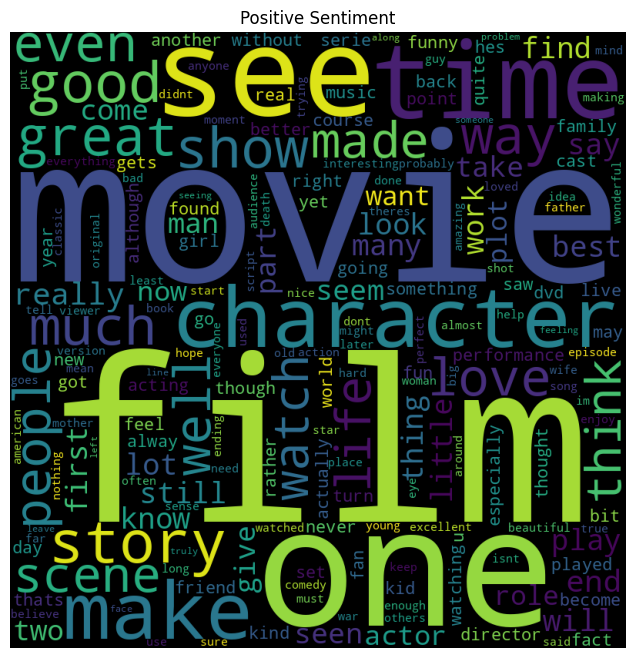

In [33]:
stopwords = set(STOPWORDS) 
sentences=imdb['review']
from matplotlib import pyplot as plt
pos=' '.join(map(str,sentences[imdb['sentiment']==1]))
neg=' '.join(map(str,sentences[imdb['sentiment']==0]))
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

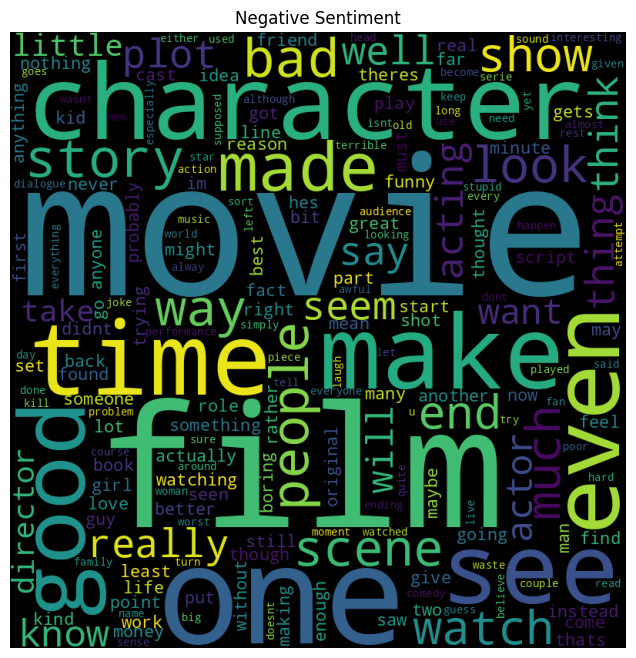

In [34]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) 

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()

* **Spelling Correction**

In [35]:
"""def batch_spelling_correction(texts):
    corrected_texts = []
    for text in texts:
        textblob = TextBlob(text)
        corrected_text = textblob.correct().string
        corrected_texts.append(corrected_text)
    return corrected_texts

def parallel_spelling_correction(texts, n_jobs=-1, batch_size=1000):
    # Split the texts into batches
    text_batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]
    
    # Apply spelling correction to each batch in parallel
    corrected_batches = Parallel(n_jobs=n_jobs)(
        delayed(batch_spelling_correction)(batch) for batch in text_batches
    )
    
    # Flatten the list of corrected batches
    corrected_texts = [text for batch in corrected_batches for text in batch]
    
    return corrected_texts

# Define the number of parallel jobs
n_jobs = -1  # Use all available CPU cores

# Apply parallel spelling correction to the 'review' column of the IMDb dataset
imdb['review'] = parallel_spelling_correction(imdb['review'], n_jobs=n_jobs)
"""

"def batch_spelling_correction(texts):\n    corrected_texts = []\n    for text in texts:\n        textblob = TextBlob(text)\n        corrected_text = textblob.correct().string\n        corrected_texts.append(corrected_text)\n    return corrected_texts\n\ndef parallel_spelling_correction(texts, n_jobs=-1, batch_size=1000):\n    # Split the texts into batches\n    text_batches = [texts[i:i+batch_size] for i in range(0, len(texts), batch_size)]\n    \n    # Apply spelling correction to each batch in parallel\n    corrected_batches = Parallel(n_jobs=n_jobs)(\n        delayed(batch_spelling_correction)(batch) for batch in text_batches\n    )\n    \n    # Flatten the list of corrected batches\n    corrected_texts = [text for batch in corrected_batches for text in batch]\n    \n    return corrected_texts\n\n# Define the number of parallel jobs\nn_jobs = -1  # Use all available CPU cores\n\n# Apply parallel spelling correction to the 'review' column of the IMDb dataset\nimdb['review'] = parall

In [36]:
#def spelling_correction(text):
#    textblob = TextBlob(text)
#    correct_text = textblob.correct().string
#    return correct_text

#imdb['review'] = imdb['review'].apply(spelling_correction)

* **Removing contractions**

In [37]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

imdb['review'] = imdb['review'].apply(expand_contractions)

* **Tokenize the text**

In [38]:
def do_tokenization(text):
    
    token_words = word_tokenize(text)
    return token_words

imdb['review'] = imdb['review'].apply(do_tokenization)

In [39]:
imdb.head(5)

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",1
1,"[a, wonderful, little, production, the, filmin...",1
2,"[i, thought, this, was, a, wonderful, way, to,...",1
3,"[basically, there, is, a, family, where, a, li...",0
4,"[petter, matteis, love, in, the, time, of, mon...",1


* **Removing Stop Words**

In [40]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# Function to remove stop words
def remove_stopwords(text):
    #words = text.split()  # Split text into words
    filtered_words = [word for word in text if word.lower() not in stop_words]
    return ' '.join(filtered_words)

imdb['review'] = imdb['review'].apply(remove_stopwords)

In [41]:
imdb.head(5)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter matteis love time money visually stunni...,1


* **Removing the numeric value**

In [42]:
#imdb['review'] = imdb.review.str.replace(r'\d+', r'', regex=True)


* **Stemming the text**

In [43]:
imdb.isnull().sum()

review       0
sentiment    0
dtype: int64

In [44]:
def do_stemming(token_words):
    ps = PorterStemmer()
    words = token_words.split()
    return [ps.stem(word) for word in words]
imdb['review'] = imdb['review'].apply(do_stemming)

In [45]:
imdb.head()

,review,sentiment
0,"[one, review, mention, watch, 1, oz, episod, h...",1
1,"[wonder, littl, product, film, techniqu, unass...",1
2,"[thought, wonder, way, spend, time, hot, summe...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Train Test Split
</div>



In [46]:
review = imdb['review']
sentiment = imdb['sentiment']

In [47]:
X_train_review, X_test_review, y_train_sentiment, y_test_sentiment = train_test_split(review, sentiment, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train_review.shape, y_train_sentiment.shape)
print("Testing set shape:", X_test_review.shape,y_test_sentiment.shape)

Training set shape: (40000,) (40000,)
Testing set shape: (10000,) (10000,)


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Tokenization on text data 
</div>



In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer()


In [49]:
tok.fit_on_texts(X_train_review)


In [50]:
len(tok.word_index)


155710

In [70]:
X_train = tok.texts_to_sequences(X_train_review)
X_test = tok.texts_to_sequences(X_test_review)

In [71]:
for num in X_train[0]:
    print(num, end=' ')

701 355 40 271 816 730 2233 255 4176 7357 9919 107 1487 27 404 29 3382 11 51 938 1617 994 232 105 842 364 7861 71 1165 19894 1661 1812 144 20 56 372 160 18789 127 2155 15 3 975 26 60 2 127 223 4120 31300 1331 7982 50 119 27414 37777 1408 2697 344 280 269 36 31 308 2668 400 2449 318 7983 1308 9920 52707 52708 172 84 347 369 73 2620 602 296 19 155 48 527 137 182 311 5 1261 148 52709 963 94 8351 1088 639 283 4 2485 7282 3130 1426 24709 121 78 117 920 655 6624 3878 861 1 586 11280 177 37778 166 10 40 40 78 2782 5996 277 61 1971 13226 91 603 267 1478 19895 1978 31301 11023 202 563 282 1471 1094 5228 1692 71 286 913 564 301 1078 176 1949 324 21201 23 2125 885 8627 1141 10 11592 137 3 111 561 915 590 2731 17829 125 290 3099 1602 109 3526 27415 716 64 55 67 42 391 144 235 1223 1420 895 404 2 2882 1625 858 172 361 2195 7453 31302 309 3085 2866 127 49 3181 

In [72]:
# Print corresponding words horizontally
for num in X_train[0]:
    word = tok.index_word.get(num, 'UNK')  
    print(word, end=' ')

kept ask mani fight scream match swear gener mayhem permeat 84 minut comparison also stand think onedimension charact littl depth virtual imposs care happen badli written cypher director hang multicultur belief topic done much better drama tv cinemai must confess realli one spot bad perform film must said nichola burley heroin slutti best friend wasim zakir nasti bulli brother absolut terribl know act school graduat id appli full refund post hast samina awan lead role manag impress cast socal british talent well probabl never hear least hope next time hire differ scoutanoth intrigu thought hideous fashion soundtrack featur like snow patrol ian brown kean bit music fan familiar artist output recognis track movi apart omnipres run bside anyon get mani mani music montag telegraph suppos feel accompani startlingli origin imag coupl kiss swollen lake canoodl doorway problem none song convey mood effici realis director lack abil carri emot journey audienc storytel dialogu aloneth end presum 

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Padding of the data 
</div>



In [73]:
max_length = 0
for sequence in X_train:
    # Calculate the length of the sequence
    sequence_length = len(sequence)
    # Update max_length if the current sequence length is greater
    if sequence_length > max_length:
        max_length = sequence_length

print("Maximum sequence length:", max_length)

Maximum sequence length: 1419


In [74]:
X_train=pad_sequences(X_train,maxlen=100,padding="post")
X_test=pad_sequences(X_test,maxlen=100,padding="post")

In [75]:
X_train

array([[ 1426, 24709,   121, ...,   127,    49,  3181],
       [  145,    42,    38, ...,    21,  1576,    12],
       [  432,    28,    14, ...,     0,     0,     0],
       ...,
       [  589,     3,   269, ...,     0,     0,     0],
       [  211,    92,   254, ...,     0,     0,     0],
       [  453,     1,   192, ...,     0,     0,     0]], dtype=int32)

In [76]:
y_train_sentiment

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Count Vectorization 
</div>



In [77]:
# Initialize the CountVectorizer
#vectorizer = CountVectorizer()

# Fit the vectorizer on the training set and transform them into feature vectors
#X_train = vectorizer.fit_transform(X_train_review)

# Transform the test set into feature vectors
#X_test = vectorizer.transform(X_test_review)

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    Word2Vec  
</div>



In [78]:
"""embedding_model = Word2Vec(sentences=imdb['review'], vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Apply word embeddings to the preprocessed text data
def apply_word_embeddings(text, model):
    embedded_text = []
    for word in text:
        if word in model.wv:
            embedded_text.append(model.wv[word])
        else:
            # Handle out-of-vocabulary words
            embedded_text.append(np.zeros(model.vector_size))  # Replace with appropriate handling
    return embedded_text

# Apply word embeddings to the 'processed_text' column
imdb['embedded_text'] = imdb['review'].apply(lambda x: apply_word_embeddings(x, embedding_model))
"""

"embedding_model = Word2Vec(sentences=imdb['review'], vector_size=100, window=5, min_count=1, workers=4)\n\n# Step 4: Apply word embeddings to the preprocessed text data\ndef apply_word_embeddings(text, model):\n    embedded_text = []\n    for word in text:\n        if word in model.wv:\n            embedded_text.append(model.wv[word])\n        else:\n            # Handle out-of-vocabulary words\n            embedded_text.append(np.zeros(model.vector_size))  # Replace with appropriate handling\n    return embedded_text\n\n# Apply word embeddings to the 'processed_text' column\nimdb['embedded_text'] = imdb['review'].apply(lambda x: apply_word_embeddings(x, embedding_model))\n"

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    TF-IDF Vectorization 
</div>



In [79]:
"""def apply_tfidf(text):
    
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)

    X_tfidf = tfidf_vectorizer.fit_transform(text)
    
    return X_tfidf

imdb['review'] = imdb['review'].apply(apply_tfidf)"""

"def apply_tfidf(text):\n    \n    tfidf_vectorizer = TfidfVectorizer(max_features=5000)\n\n    X_tfidf = tfidf_vectorizer.fit_transform(text)\n    \n    return X_tfidf\n\nimdb['review'] = imdb['review'].apply(apply_tfidf)"

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Defining the LSTM Model
</div>

In [80]:
#embedding_dim = embedding_model.vector_size
#print("Embedding dimension:", embedding_dim)

In [81]:
print("X_train_review type:", type(X_train))
print("X_train_review shape:", X_train_review.shape)

print("y_train_sentiment type:", type(y_train_sentiment))
print("y_train_sentiment shape:", y_train_sentiment.shape)

print("X_test_review type:", type(X_test))
print("X_test_review shape:", X_test_review.shape)

print("y_test_sentiment type:", type(y_test_sentiment))
print("y_test_sentiment shape:", y_test_sentiment.shape)


X_train_review type: <class 'numpy.ndarray'>
X_train_review shape: (40000,)
y_train_sentiment type: <class 'pandas.core.series.Series'>
y_train_sentiment shape: (40000,)
X_test_review type: <class 'numpy.ndarray'>
X_test_review shape: (10000,)
y_test_sentiment type: <class 'pandas.core.series.Series'>
y_test_sentiment shape: (10000,)


In [82]:
len(tok.index_word)+1

155711

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    LSTM Model 
</div>

![LSTM](https://apmonitor.com/pds/uploads/Main/lstm_node.png)

In [83]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=len(tok.word_index)+1, output_dim=100))
model.add(LSTM(150))
model.add(Dense(units=1, activation='sigmoid'))

In [84]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
history = model.fit(X_train, y_train_sentiment, batch_size=32, epochs=10, validation_data=(X_test,y_test_sentiment))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.6232 - loss: 0.6330 - val_accuracy: 0.8569 - val_loss: 0.3296
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.9011 - loss: 0.2582 - val_accuracy: 0.8829 - val_loss: 0.2835
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9538 - loss: 0.1349 - val_accuracy: 0.8756 - val_loss: 0.3588
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9802 - loss: 0.0647 - val_accuracy: 0.8739 - val_loss: 0.3850
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9912 - loss: 0.0312 - val_accuracy: 0.8721 - val_loss: 0.5022
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9948 - loss: 0.0179 - val_accuracy: 0.8697 - val_loss: 0.5101
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9975 - loss: 0.0094 - val_accuracy: 0.8641 - val_loss: 0.5873
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.9986 -

In [86]:
"""model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train_review.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])"""

"model = Sequential()\nmodel.add(Embedding(5000, 128, input_length=X_train_review.shape[1]))\nmodel.add(SpatialDropout1D(0.4))\nmodel.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])"

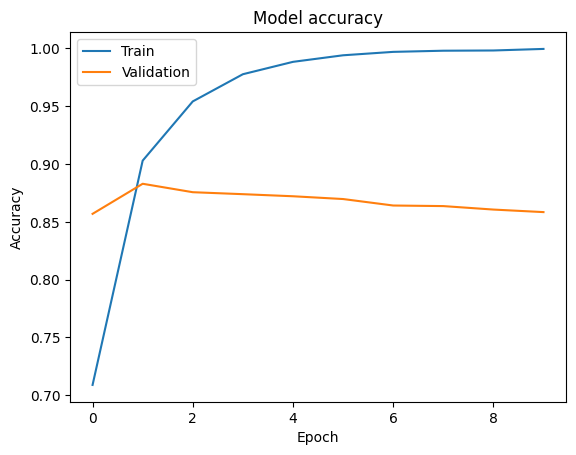

In [87]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

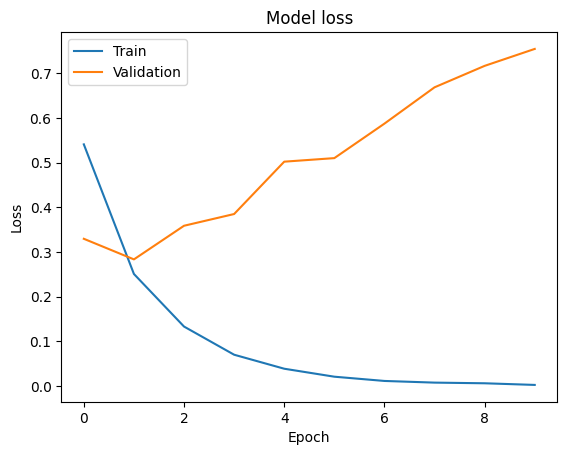

In [88]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
    GRU Model 
</div>

![GRU](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Gated_Recurrent_Unit.svg/2560px-Gated_Recurrent_Unit.svg.png)

In [89]:
from keras.layers import GRU,Dropout

model_1 = Sequential()
model_1.add(Embedding(input_dim=len(tok.word_index)+1, output_dim=100))
model_1.add(GRU(100, return_sequences=True))
model_1.add(Dropout(0.5))  
model_1.add(GRU(100))
model_1.add(Dropout(0.5)) 
model_1.add(Dense(units=1, activation='sigmoid'))

In [90]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [91]:
history_1 = model_1.fit(X_train, y_train_sentiment, batch_size=32, epochs=10, validation_data=(X_test,y_test_sentiment))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.6179 - loss: 0.6166 - val_accuracy: 0.8812 - val_loss: 0.2904
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9245 - loss: 0.2054 - val_accuracy: 0.8926 - val_loss: 0.2687
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9721 - loss: 0.0879 - val_accuracy: 0.8660 - val_loss: 0.4417
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.8719 - val_loss: 0.4624
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9956 - loss: 0.0158 - val_accuracy: 0.8688 - val_loss: 0.5892
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.8616 - val_loss: 0.7039
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9975 - loss: 0.0090 - val_accuracy: 0.8609 - val_loss: 0.7875
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9986 -

<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Hypertune Model RNN GRU
</div>

![GRU](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Gated_Recurrent_Unit.svg/2560px-Gated_Recurrent_Unit.svg.png)

In [146]:
import keras

def GRU_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(input_dim=len(tok.word_index) + 1, output_dim=100, input_shape=(X_train.shape[1],)))
    
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    model.add(keras.layers.GRU(units, return_sequences=True))
    model.add(keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(keras.layers.GRU(units, return_sequences=True))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))
        
    model.add(keras.layers.GRU(units))
    model.add(keras.layers.Dropout(rate=hp.Float('final_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    print("Model built with the following architecture:")
    model.summary()
    
    return model


In [148]:
import kerastuner as kt
tuner = kt.RandomSearch(GRU_model,objective = 'val_accuracy',
                       max_trials = 5,
                       directory = '/kaggle/working/',
                       project_name='GRU_hyperparameter_tuning4')

Model built with the following architecture:


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │    15,571,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 100, 32)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 100, 32)        │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_8 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,596,669 (59.50 MB)

 Trainable params: 15,596,669 (59.50 MB)

 Non-trainable params: 0 (0.00 B)

In [149]:
import tensorflow
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

In [150]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
tuner.search(X_train_reshaped, y_train_sentiment, epochs=100, validation_data=(X_test_reshaped, y_test_sentiment), callbacks=[early_stopping])

Trial 5 Complete [00h 04m 16s]
val_accuracy: 0.8877999782562256

Best val_accuracy So Far: 0.8878999948501587
Total elapsed time: 00h 18m 12s


In [153]:
best_model = tuner.get_best_models(num_models=1)[0]

Model built with the following architecture:


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 100)       │    15,571,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 32)        │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 100, 32)        │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,596,669 (59.50 MB)

 Trainable params: 15,596,669 (59.50 MB)

 Non-trainable params: 0 (0.00 B)

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Prediction
</div>

* LSTM PREDICTION

In [92]:
lstm_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [97]:
lstm_pred = (lstm_pred > 0.5).astype('int')

In [100]:
print("Accuracy Score is :",accuracy_score(lstm_pred,y_test_sentiment)*100,'%')

Accuracy Score is : 85.84 %


In [102]:
sentiment_labels = {0: 'negative', 1: 'positive'}

lstm_sentiments = [[sentiment_labels[val[0]]] for val in lstm_pred]
lstm_sentiments[0:10]

[['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['negative']]

In [113]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test_sentiment, lstm_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.862994,0.849426,0.856156,4961.0000
1,0.854016,0.867236,0.860575,5039.0000
accuracy,0.858400,0.858400,0.858400,0.8584
macro avg,0.858505,0.858331,0.858366,10000.0000
weighted avg,0.858470,0.858400,0.858383,10000.0000


* GRU PREDICTION

In [103]:
gru_pred = model_1.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [104]:
gru_pred = (gru_pred > 0.5).astype('int')

In [105]:
print("Accuracy Score is :",accuracy_score(gru_pred,y_test_sentiment)*100,'%')

Accuracy Score is : 86.04 %


In [106]:
sentiment_labels = {0: 'negative', 1: 'positive'}

gru_sentiments = [[sentiment_labels[val[0]]] for val in gru_pred]
gru_sentiments[0:10]

[['positive'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['negative']]

In [114]:
report_dict = classification_report(y_test_sentiment, gru_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.867299,0.848418,0.857754,4961.0000
1,0.853895,0.872197,0.862949,5039.0000
accuracy,0.860400,0.860400,0.860400,0.8604
macro avg,0.860597,0.860307,0.860352,10000.0000
weighted avg,0.860545,0.860400,0.860372,10000.0000


* **Hypertune GRU Model**

In [154]:
hypertune_pred = best_model.predict(X_test_reshaped)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [155]:
loss, accuracy = best_model.evaluate(X_test_reshaped, y_test_sentiment)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8852 - loss: 0.2817
Test Loss: 0.2795788645744324
Test Accuracy: 0.8878999948501587


In [158]:
hypertune_pred = (hypertune_pred > 0.5).astype('int')
sentiment_labels = {0: 'negative', 1: 'positive'}

hypertune_gru_sentiments = [[sentiment_labels[val[0]]] for val in hypertune_pred]
hypertune_gru_sentiments[0:10]

[['negative'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['negative'],
 ['positive'],
 ['positive'],
 ['negative'],
 ['negative'],
 ['negative']]

In [160]:
print("Accuracy Score is :",accuracy_score(hypertune_pred,y_test_sentiment)*100,'%')

Accuracy Score is : 88.79 %


In [161]:
report_dict = classification_report(y_test_sentiment, hypertune_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df

,precision,recall,f1-score,support
0,0.895876,0.875831,0.885740,4961.0000
1,0.880388,0.899782,0.889979,5039.0000
accuracy,0.887900,0.887900,0.887900,0.8879
macro avg,0.888132,0.887807,0.887860,10000.0000
weighted avg,0.888072,0.887900,0.887876,10000.0000


<div style="color:white; background-color:#5642C5; padding: 10px; border-radius: 15px; font-size: 150%; font-family: Verdana; text-align:center; -webkit-text-stroke-width: 1px; -webkit-text-stroke-color: black; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
   Comparision Between All Prediction
</div>

In [162]:
gru_df = pd.DataFrame(gru_sentiments, columns=['GRU_Sentiment'])
lstm_df = pd.DataFrame(lstm_sentiments, columns=['LSTM_Sentiment'])
hypertune_gru_df = pd.DataFrame(hypertune_gru_sentiments, columns=['hypertune_gru_sentiments'])
# Concatenate the DataFrames along columns to create a single DataFrame
predictions_df = pd.concat([gru_df, lstm_df,hypertune_gru_df], axis=1)

# Display the first few rows of the DataFrame
predictions_df.head()

,GRU_Sentiment,LSTM_Sentiment,hypertune_gru_sentiments
0,positive,positive,negative
1,positive,positive,positive
2,negative,negative,negative
3,positive,positive,positive
4,negative,negative,negative


![Thank u](https://pngimg.com/d/thank_you_PNG66.png)